The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.metrics import accuracy_score,classification_report,plot_roc_curve

from scipy.stats import zscore
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

from imblearn.over_sampling import SMOTE



In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


we want to predict whether the person survived=1 or not 0. based on other features.
So this is a classification problem

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


891 rows × 12 columns

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are some missing data in some features like 
Age has 177, cabin has 687 and Embarked has 2 missing values.

## Missing Data

In [8]:
cabinMiss=(687/891)*100

In [9]:
cabinMiss

77.10437710437711

77% of data is missing in Cabin feature so dropping it as missing data is more

In [10]:
df.drop('Cabin',axis=1,inplace=True)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

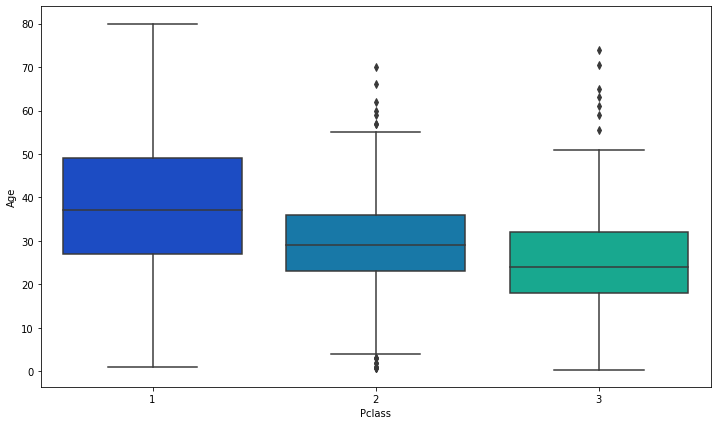

In [11]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

In [12]:
df.groupby("Pclass").mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [13]:
df.groupby("Pclass").mean()['Age']

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age

In [14]:
ageMiss=(177/891)
ageMiss

0.19865319865319866

In [15]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [16]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

In [17]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [18]:
embarkedMiss=(2/891)*100
embarkedMiss

0.22446689113355783

for embarked only 0.2% data is missing so will drop it


In [19]:
df.dropna(inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


Now there is no missing data. PassengerId column is just a id and doesnt help in classification
So will drop it.
Similarly the Name feature doesnt help in classification so will drop that as well.

In [21]:
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [22]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,24.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [23]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.019314,0.524184,0.382452,32.096681
std,0.486260,0.834700,13.209814,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,36.500000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [24]:
df['Survived'].unique()

array([0, 1], dtype=int64)

In [25]:
df['Sex'].value_counts()

male      577
female    312
Name: Sex, dtype: int64

In [26]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

### checking for outliers

In [27]:

zScores=np.abs(zscore(df.drop(['Sex','Embarked'],axis=1)))
zScores

array([[0.78696114, 0.82520863, 0.53167023, 0.43135024, 0.47432585,
        0.50023975],
       [1.27071078, 1.57221121, 0.68023223, 0.43135024, 0.47432585,
        0.78894661],
       [1.27071078, 0.82520863, 0.22869462, 0.47519908, 0.47432585,
        0.48664993],
       ...,
       [0.78696114, 0.82520863, 0.38018243, 0.43135024, 2.00611934,
        0.17408416],
       [1.27071078, 1.57221121, 0.22869462, 0.47519908, 0.47432585,
        0.0422126 ],
       [0.78696114, 0.82520863, 0.22576881, 0.47519908, 0.47432585,
        0.49017322]])

In [28]:
filteredEntries=(zScores<3).all(axis=1)
filteredEntries

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True, False,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [29]:
np.sum(filteredEntries)

818

In [30]:
(889 -818)/889

0.0798650168728909

only 7% of data are outliers So removing them.

In [31]:
df[filteredEntries]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,24.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


### EDA

<AxesSubplot:xlabel='Age', ylabel='Fare'>

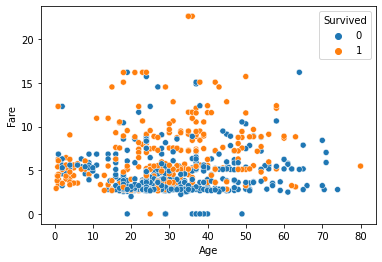

In [66]:
sns.scatterplot(data=df,x='Age',y='Fare',hue='Survived')

<AxesSubplot:xlabel='Age', ylabel='Survived'>

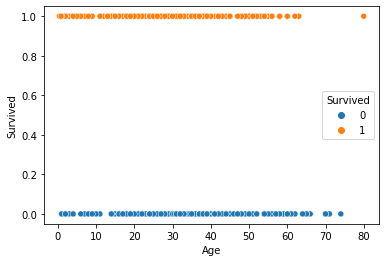

In [68]:
sns.scatterplot(data=df,x='Age',y='Survived',hue='Survived')

<AxesSubplot:xlabel='Age', ylabel='Pclass'>

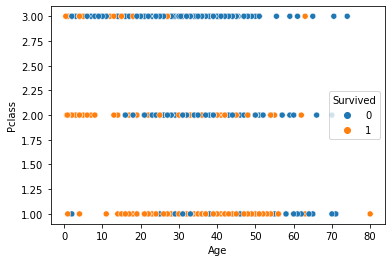

In [69]:
sns.scatterplot(data=df,x='Age',y='Pclass',hue='Survived')

<AxesSubplot:xlabel='Survived', ylabel='count'>

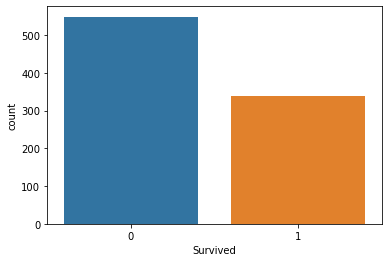

In [32]:
sns.countplot(x='Survived',data=df)

In [33]:
df['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [34]:
len(df)

889

In [35]:
(340/889)*100

38.24521934758155

In [36]:
(549/889)*100

61.754780652418454

The data is split into 39:61 , almost balanced so need not balance the data

<AxesSubplot:xlabel='Sex', ylabel='count'>

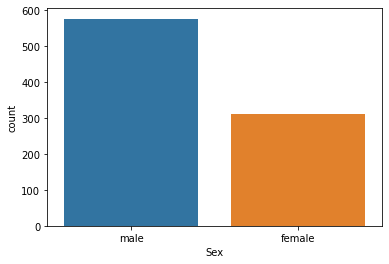

In [37]:
sns.countplot(x='Sex',data=df)

In [38]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

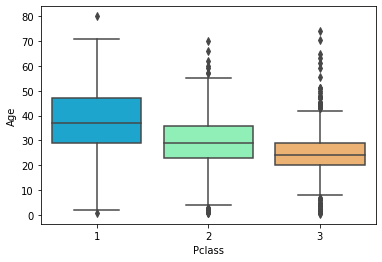

In [39]:
sns.boxplot(x='Pclass',y='Age',data=df,palette='rainbow')

In [40]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [41]:
numericCols=['Pclass','Age','SibSp','Parch','Fare']

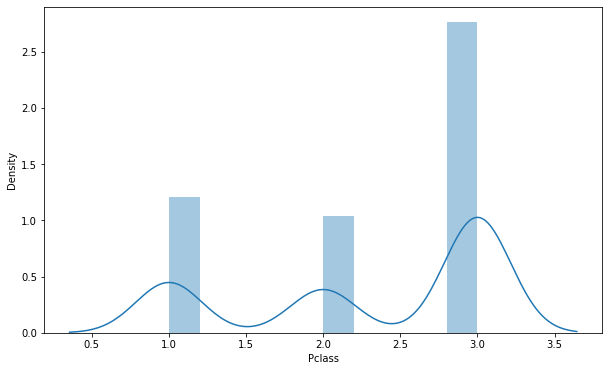

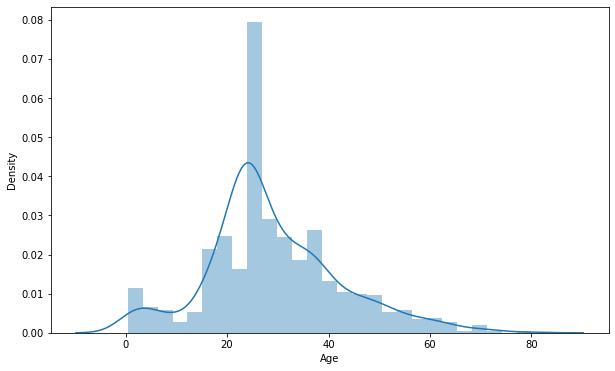

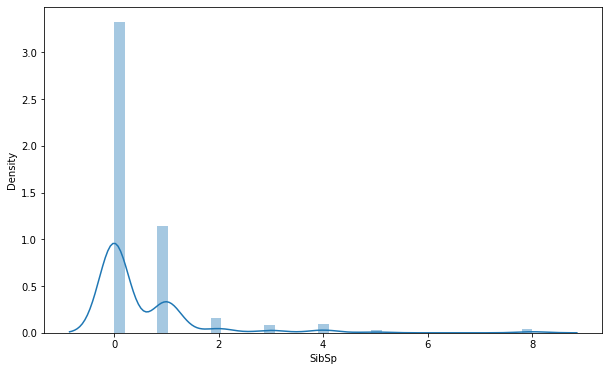

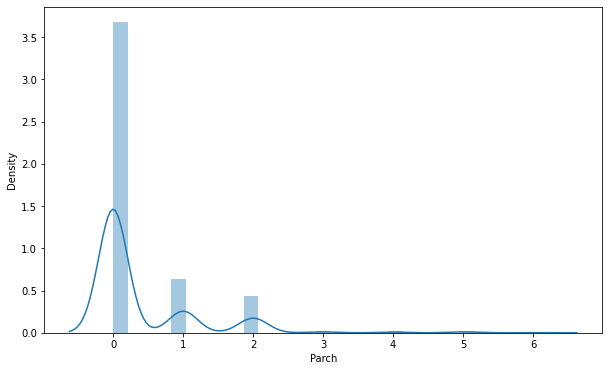

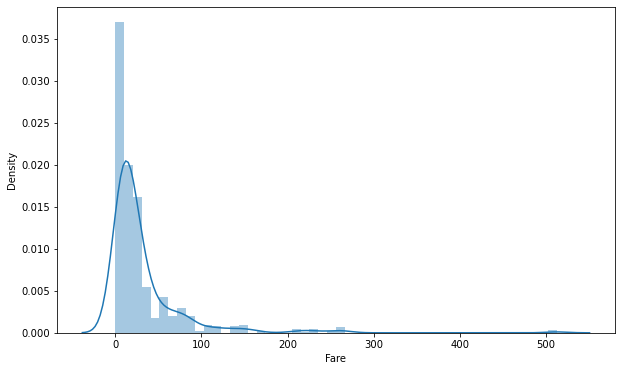

In [42]:
for x in numericCols:
    fig = plt.figure(figsize = (10,6))
    sns.distplot(df[x])

Most Of the features here are skewed

## checking the skewness values

In [43]:
for column in numericCols:
    print(column , df[column].skew())

Pclass -0.6369977585999191
Age 0.5467175424666029
SibSp 3.6910576308362284
Parch 2.74516012611158
Fare 4.801440211044194


Removing the skewness for SibSp,Parch,Fare

In [44]:
skewedColumns=['SibSp','Parch','Fare']

In [45]:
def min_skewness(colu):
    min_Skew=np.abs(df[colu].skew())
    print("initial",min_Skew)
    
    box_col_Skew=10
    min_SkewType=""
    log_col=np.log(df[colu])
    sqrt_col=np.sqrt(df[colu])
    try:
        box_col=stats.boxcox(df[colu])[0]
        box_col_Skew=np.abs(pd.Series(box_col).skew())
        print(box_col_Skew)

    except ValueError:
        print("hi")
    
    log_col_Skew=np.abs(log_col.skew())
    sqrt_col_Skew=np.abs(sqrt_col.skew())
    
    print(log_col_Skew)
    print(sqrt_col_Skew)
    
    if log_col_Skew<min_Skew:
        min_SkewType="log"
        min_Skew=log_col_Skew
    if sqrt_col_Skew<min_Skew:
        min_SkewType="sqrt"
        min_Skew=sqrt_col_Skew
    if box_col_Skew<min_Skew:
        min_SkewType="box"
        min_Skew=box_col_Skew
    print(min_Skew)
    print(column,"=",min_SkewType)

In [46]:
for column in skewedColumns:
    print(column)
    min_skewness(column)
    print("="*20)

SibSp
initial 3.6910576308362284
hi
nan
1.4331479153470184
1.4331479153470184
SibSp = sqrt
Parch
initial 2.74516012611158
hi
nan
1.526297876780584
1.526297876780584
Parch = sqrt
Fare
initial 4.801440211044194
hi
nan
2.0996611285066007
2.0996611285066007
Fare = sqrt


### Sqrt for SibSp, Parch, Fare

In [47]:
df['SibSp']= np.sqrt(df['SibSp'])
df['Parch']=  np.sqrt(df['Parch'])
df['Fare']=  np.sqrt(df['Fare'])


In [48]:
for column in numericCols:
    print(column , df[column].skew())

Pclass -0.6369977585999191
Age 0.5467175424666029
SibSp 1.4331479153470184
Parch 1.526297876780584
Fare 2.0996611285066007


In [49]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1.0,0.000000,2.692582,S
1,1,1,female,38.0,1.0,0.000000,8.442944,C
2,1,3,female,26.0,0.0,0.000000,2.815138,S
3,1,1,female,35.0,1.0,0.000000,7.286975,S
4,0,3,male,35.0,0.0,0.000000,2.837252,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0.0,0.000000,3.605551,S
887,1,1,female,19.0,0.0,0.000000,5.477226,S
888,0,3,female,24.0,1.0,1.414214,4.842520,S
889,1,1,male,26.0,0.0,0.000000,5.477226,C


In [52]:
pd.get_dummies(df,drop_first=True)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1.0,0.000000,2.692582,1,0,1
1,1,1,38.0,1.0,0.000000,8.442944,0,0,0
2,1,3,26.0,0.0,0.000000,2.815138,0,0,1
3,1,1,35.0,1.0,0.000000,7.286975,0,0,1
4,0,3,35.0,0.0,0.000000,2.837252,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0.0,0.000000,3.605551,1,0,1
887,1,1,19.0,0.0,0.000000,5.477226,0,0,1
888,0,3,24.0,1.0,1.414214,4.842520,0,0,1
889,1,1,26.0,0.0,0.000000,5.477226,1,0,0


In [55]:
df=pd.get_dummies(df,drop_first=True)

In [57]:
numericCols

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [58]:
numericFtrs=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare','Survived']

In [61]:
df[numericFtrs].corr()

,Pclass,Age,SibSp,Parch,Fare,Survived
Pclass,1.000000,-0.405549,0.003843,-0.008720,-0.659204,-0.335549
Age,-0.405549,1.000000,-0.216098,-0.226287,0.145828,-0.052051
SibSp,0.003843,-0.216098,1.000000,0.473193,0.312133,0.045431
Parch,-0.008720,-0.226287,0.473193,1.000000,0.322840,0.123454
Fare,-0.659204,0.145828,0.312133,0.322840,1.000000,0.309778
Survived,-0.335549,-0.052051,0.045431,0.123454,0.309778,1.000000


<AxesSubplot:>

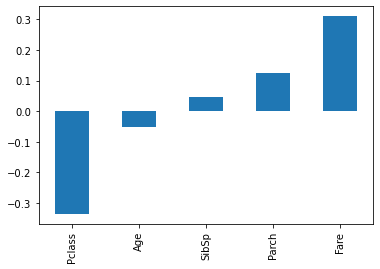

In [62]:
df[numericFtrs].corr()['Survived'][:-1].sort_values().plot(kind='bar')

Pclass is highly negatively Corelated
Agre  is less negatively corelated
SibSp, Parch is somewhat positively corelated
Fare is more positively corelated

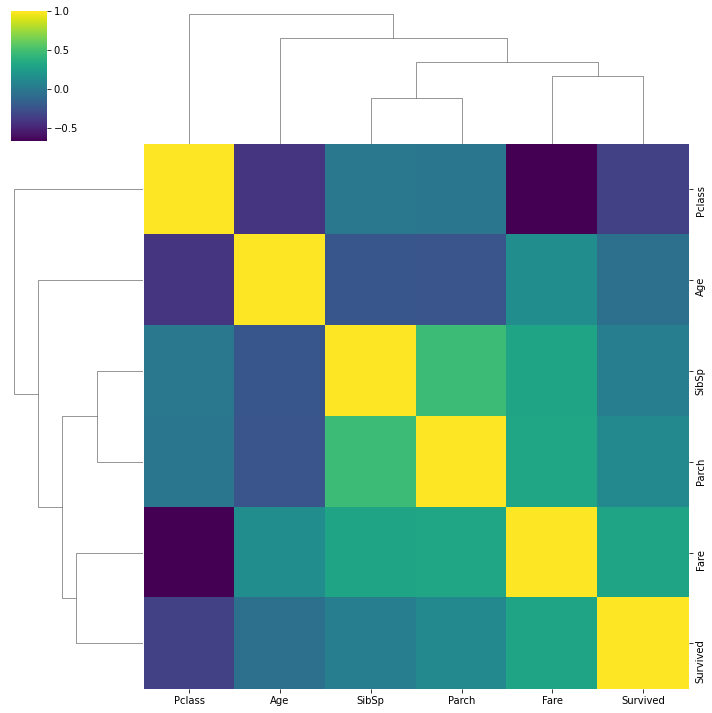

In [63]:
sns.clustermap(df[numericFtrs].corr(),cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

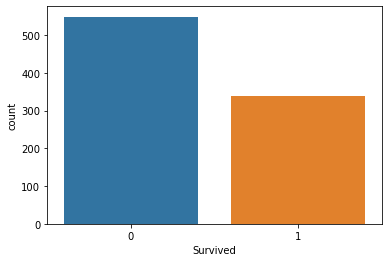

In [64]:
sns.countplot(df['Survived'])

The classes are almost balanced

splitting into X and y features

In [71]:
df.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [73]:
X=df.drop('Survived',axis=1)
y=df['Survived']

# Applying different machine learning models now

## identifying the best random state

In [77]:
max_accu=0
maxRS=0
for i in range(200):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=i)
    dt=DecisionTreeClassifier()
    dt.fit(X_train,y_train)
    pred=dt.predict(X_test)
    accurac=accuracy_score(y_test,pred)
    #print(accurac*100,"at random state",i)
    if(accurac>max_accu):
        max_accu=accurac
        maxRS=i
        
print("best accuracy is",max_accu,"on random state",maxRS)

best accuracy is 0.8435374149659864 on random state 88


best accuracy is 0.8435374149659864 on random state 88

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=88)

**TASK: Scale the X train and X test data.**

In [80]:
from sklearn.preprocessing import StandardScaler

In [81]:
scaler = StandardScaler()

In [82]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [83]:
DTC=DecisionTreeClassifier()
DTC.fit(scaled_X_train,y_train)
pred=DTC.predict(scaled_X_test)
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       0.87      0.86      0.87       176
           1       0.79      0.81      0.80       118

    accuracy                           0.84       294
   macro avg       0.83      0.84      0.83       294
weighted avg       0.84      0.84      0.84       294



In [84]:
RFC=RandomForestClassifier()
RFC.fit(scaled_X_train,y_train)
pred=RFC.predict(scaled_X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       176
           1       0.78      0.79      0.78       118

    accuracy                           0.82       294
   macro avg       0.82      0.82      0.82       294
weighted avg       0.82      0.82      0.82       294



In [85]:
svc=SVC()
svc.fit(scaled_X_train,y_train)
pred=svc.predict(scaled_X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.80      0.94      0.87       176
           1       0.88      0.66      0.75       118

    accuracy                           0.83       294
   macro avg       0.84      0.80      0.81       294
weighted avg       0.83      0.83      0.82       294



In [86]:
ada=AdaBoostClassifier()
ada.fit(scaled_X_train,y_train)
pred=ada.predict(scaled_X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       176
           1       0.74      0.71      0.73       118

    accuracy                           0.79       294
   macro avg       0.78      0.77      0.78       294
weighted avg       0.78      0.79      0.78       294



In [87]:
dtcAC=0.84
rfcAC=0.82
svcAC=0.83
adaAC=0.79

### now checking cross val score

In [89]:
from sklearn.preprocessing import StandardScaler

In [90]:
scaler=StandardScaler()

In [92]:
X_scale=scaler.fit_transform(X)

In [94]:
DTCcv=cross_val_score(DTC,X_scale,y,cv=5).mean()
DTCcv

0.7784422014854313

In [95]:
RFCcv=cross_val_score(RFC,X_scale,y,cv=5).mean()
RFCcv

0.8133117501428299

In [96]:
svcCV=cross_val_score(svc,X_scale,y,cv=5).mean()
svcCV

0.8279565796991051

In [97]:
adaCV=cross_val_score(ada,X_scale,y,cv=5).mean()
adaCV

0.8178061321653018

In [98]:
print(dtcAC-DTCcv)
print(rfcAC-RFCcv)
print(svcAC-svcCV)
print(adaAC-adaCV)

0.06155779851456866
0.006688249857170092
0.0020434203008948826
-0.02780613216530181


SupportVector classifier has the less difference between the accuracy scores and Cross val score, so it is the best model

## HyperParameterTuning

In [99]:
from sklearn.model_selection import GridSearchCV

In [100]:
svc

SVC()

In [101]:
help(svc)

Help on SVC in module sklearn.svm._classes object:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each


In [117]:
param_grid = {'C':[0.01,0.1,1],'kernel':['linear','rbf','poly'],'degree':[1,2,3]}
grid = GridSearchCV(svc,param_grid,verbose=10)

In [118]:
grid.fit(scaled_X_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5; 1/27] START C=0.01, degree=1, kernel=linear............................
[CV 1/5; 1/27] END C=0.01, degree=1, kernel=linear;, score=0.840 total time=   0.0s
[CV 2/5; 1/27] START C=0.01, degree=1, kernel=linear............................
[CV 2/5; 1/27] END C=0.01, degree=1, kernel=linear;, score=0.840 total time=   0.0s
[CV 3/5; 1/27] START C=0.01, degree=1, kernel=linear............................
[CV 3/5; 1/27] END C=0.01, degree=1, kernel=linear;, score=0.773 total time=   0.0s
[CV 4/5; 1/27] START C=0.01, degree=1, kernel=linear............................
[CV 4/5; 1/27] END C=0.01, degree=1, kernel=linear;, score=0.739 total time=   0.0s
[CV 5/5; 1/27] START C=0.01, degree=1, kernel=linear............................
[CV 5/5; 1/27] END C=0.01, degree=1, kernel=linear;, score=0.773 total time=   0.0s
[CV 1/5; 2/27] START C=0.01, degree=1, kernel=rbf...............................
[CV 1/5; 2/27] END C=0.01, degre

[CV 2/5; 11/27] END C=0.1, degree=1, kernel=rbf;, score=0.773 total time=   0.0s
[CV 3/5; 11/27] START C=0.1, degree=1, kernel=rbf...............................
[CV 3/5; 11/27] END C=0.1, degree=1, kernel=rbf;, score=0.782 total time=   0.0s
[CV 4/5; 11/27] START C=0.1, degree=1, kernel=rbf...............................
[CV 4/5; 11/27] END C=0.1, degree=1, kernel=rbf;, score=0.782 total time=   0.0s
[CV 5/5; 11/27] START C=0.1, degree=1, kernel=rbf...............................
[CV 5/5; 11/27] END C=0.1, degree=1, kernel=rbf;, score=0.756 total time=   0.0s
[CV 1/5; 12/27] START C=0.1, degree=1, kernel=poly..............................
[CV 1/5; 12/27] END C=0.1, degree=1, kernel=poly;, score=0.840 total time=   0.0s
[CV 2/5; 12/27] START C=0.1, degree=1, kernel=poly..............................
[CV 2/5; 12/27] END C=0.1, degree=1, kernel=poly;, score=0.840 total time=   0.0s
[CV 3/5; 12/27] START C=0.1, degree=1, kernel=poly..............................
[CV 3/5; 12/27] END C=0.1,

[CV 1/5; 23/27] END ..C=1, degree=2, kernel=rbf;, score=0.832 total time=   0.0s
[CV 2/5; 23/27] START C=1, degree=2, kernel=rbf.................................
[CV 2/5; 23/27] END ..C=1, degree=2, kernel=rbf;, score=0.824 total time=   0.0s
[CV 3/5; 23/27] START C=1, degree=2, kernel=rbf.................................
[CV 3/5; 23/27] END ..C=1, degree=2, kernel=rbf;, score=0.756 total time=   0.0s
[CV 4/5; 23/27] START C=1, degree=2, kernel=rbf.................................
[CV 4/5; 23/27] END ..C=1, degree=2, kernel=rbf;, score=0.815 total time=   0.0s
[CV 5/5; 23/27] START C=1, degree=2, kernel=rbf.................................
[CV 5/5; 23/27] END ..C=1, degree=2, kernel=rbf;, score=0.790 total time=   0.0s
[CV 1/5; 24/27] START C=1, degree=2, kernel=poly................................
[CV 1/5; 24/27] END .C=1, degree=2, kernel=poly;, score=0.815 total time=   0.0s
[CV 2/5; 24/27] START C=1, degree=2, kernel=poly................................
[CV 2/5; 24/27] END .C=1, de

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'degree': [1, 2, 3],
                         'kernel': ['linear', 'rbf', 'poly']},
             verbose=10)

In [119]:
grid.best_params_

{'C': 1, 'degree': 3, 'kernel': 'poly'}

In [120]:
grid.best_estimator_

SVC(C=1, kernel='poly')

In [121]:
pd.DataFrame(data=grid.cv_results_,columns=grid.cv_results_.keys())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.014344,0.002305,0.001017,0.001101,0.01,1,linear,"{'C': 0.01, 'degree': 1, 'kernel': 'linear'}",0.840336,0.840336,0.773109,0.739496,0.773109,0.793277,0.040336,5
1,0.022087,0.010617,0.016053,0.001552,0.01,1,rbf,"{'C': 0.01, 'degree': 1, 'kernel': 'rbf'}",0.621849,0.621849,0.630252,0.630252,0.630252,0.626891,0.004117,25
2,0.013021,0.006529,0.006796,0.007936,0.01,1,poly,"{'C': 0.01, 'degree': 1, 'kernel': 'poly'}",0.638655,0.621849,0.663866,0.638655,0.630252,0.638655,0.014062,23
3,0.015301,0.002538,0.000369,0.000738,0.01,2,linear,"{'C': 0.01, 'degree': 2, 'kernel': 'linear'}",0.840336,0.840336,0.773109,0.739496,0.773109,0.793277,0.040336,5
4,0.017377,0.002151,0.015900,0.004007,0.01,2,rbf,"{'C': 0.01, 'degree': 2, 'kernel': 'rbf'}",0.621849,0.621849,0.630252,0.630252,0.630252,0.626891,0.004117,25
5,0.014738,0.001774,0.002401,0.003249,0.01,2,poly,"{'C': 0.01, 'degree': 2, 'kernel': 'poly'}",0.621849,0.630252,0.638655,0.630252,0.630252,0.630252,0.005315,24
6,0.016086,0.000907,0.000000,0.000000,0.01,3,linear,"{'C': 0.01, 'degree': 3, 'kernel': 'linear'}",0.840336,0.840336,0.773109,0.739496,0.773109,0.793277,0.040336,5
7,0.022647,0.004271,0.012158,0.006066,0.01,3,rbf,"{'C': 0.01, 'degree': 3, 'kernel': 'rbf'}",0.621849,0.621849,0.630252,0.630252,0.630252,0.626891,0.004117,25
8,0.010740,0.005538,0.004245,0.006133,0.01,3,poly,"{'C': 0.01, 'degree': 3, 'kernel': 'poly'}",0.638655,0.630252,0.655462,0.672269,0.630252,0.645378,0.016295,22
9,0.006593,0.008692,0.003738,0.005988,0.1,1,linear,"{'C': 0.1, 'degree': 1, 'kernel': 'linear'}",0.840336,0.840336,0.773109,0.739496,0.773109,0.793277,0.040336,5


### Displaying the confusion matrix and classification report

In [122]:
from sklearn.metrics import confusion_matrix,classification_report

In [123]:
grid_pred = grid.predict(scaled_X_test)

In [124]:
confusion_matrix(y_test,grid_pred)

array([[164,  12],
       [ 43,  75]], dtype=int64)

In [125]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           0       0.79      0.93      0.86       176
           1       0.86      0.64      0.73       118

    accuracy                           0.81       294
   macro avg       0.83      0.78      0.79       294
weighted avg       0.82      0.81      0.81       294



## Training with best params

In [ ]:
pred=ada.predict(scaled_X_test)

In [127]:
Final_model=SVC(C=1,degree=3, kernel='poly')
Final_model.fit(scaled_X_train,y_train)

pred=Final_model.predict(scaled_X_test)
accuracyScore=accuracy_score(y_test,pred)
print(accuracyScore)

0.8129251700680272


final accuracy achieved is 81.2% with Support Vector Classifier

## plotting AUC ROC CURVE

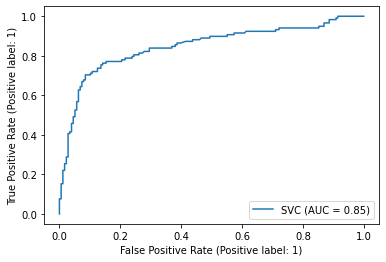

In [128]:
plot_roc_curve(Final_model,scaled_X_test,y_test)

In [ ]:
AUC-ROC Curve area is 0.85 which is very good.

## saving the model


In [130]:
import joblib
joblib.dump(Final_model,"Titanic.pkl")

['Titanic.pkl']